In [74]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

In [66]:
df=pd.read_csv('https://raw.githubusercontent.com/dnishimoto/python-deep-learning/master/Social_Network_Ads.csv')
print(df.head)
print(df.columns)
df = df.dropna()

<bound method NDFrame.head of       User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]>
Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')


In [67]:
X=df[['Gender', 'Age', 'EstimatedSalary']]
X['Gender']=X['Gender'].astype('category').cat.codes
#X=np.array(X)
#X=X.reshape(-1,1)
y=df[['Purchased']]




C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [68]:
logreg=linear_model.LogisticRegression()
logreg.fit(X,y)

C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [69]:
print(logreg.coef_)
print(logreg.intercept_)

[[-2.55787299e-03 -5.89242212e-03 -4.09449263e-09]]
[-0.00419235]


In [70]:
gender=0
age=56
estimatedSalary=100000
print(logreg.predict_proba([[gender,age,estimatedSalary]]))

prediction=logreg.predict_proba(X)
print(prediction)

[[0.58287272 0.41712728]]
[[0.52966114 0.47033886]
 [0.55306612 0.44693388]
 [0.53931154 0.46068846]
 [0.54078943 0.45921057]
 [0.52971928 0.47028072]
 [0.5414256  0.4585744 ]
 [0.54081689 0.45918311]
 [0.54819095 0.45180905]
 [0.53847277 0.46152723]
 [0.55247932 0.44752068]
 [0.53934918 0.46065082]
 [0.5393207  0.4606793 ]
 [0.53119712 0.46880288]
 [0.54869056 0.45130944]
 [0.52825725 0.47174275]
 [0.54437246 0.45562754]
 [0.57047672 0.42952328]
 [0.56758768 0.43241232]
 [0.5690353  0.4309647 ]
 [0.57129761 0.42870239]
 [0.56758366 0.43241634]
 [0.56987393 0.43012607]
 [0.57193599 0.42806401]
 [0.56695577 0.43304423]
 [0.56903028 0.43096972]
 [0.5704717  0.4295283 ]
 [0.57336497 0.42663503]
 [0.56985486 0.43014514]
 [0.54433489 0.45566511]
 [0.54723101 0.45276899]
 [0.54728782 0.45271218]
 [0.54087078 0.45912922]
 [0.53195606 0.46804394]
 [0.54223917 0.45776083]
 [0.54145813 0.45854187]
 [0.5530732  0.4469268 ]
 [0.5495263  0.4504737 ]
 [0.54580212 0.45419788]
 [0.53934104 0.46065896]

Text(0, 0.5, 'TPR')

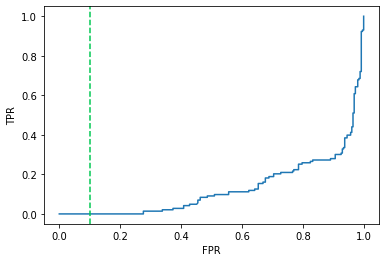

In [75]:
ytrain_pred_probas = logreg.predict_proba(X)[:, 1]   # prob of predict as 1
fpr, tpr, thresholds = roc_curve(y, ytrain_pred_probas)   # precision_recall_curve
roc = pd.DataFrame({'FPR':fpr,'TPR':tpr,'Thresholds':thresholds})

_ = plt.figure()
plt.plot(roc.FPR, roc.TPR)
plt.axvline(0.1, color = '#00C851', linestyle = '--')
plt.xlabel("FPR")
plt.ylabel("TPR")